In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras import Sequential


In [ ]:
dataset = keras.datasets.mnist
dataset

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

input_shape = (28,28,1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


NameError: name 'x_train' is not defined

In [ ]:
digits = [0,1,2,3,4,5,6,7,8,9]

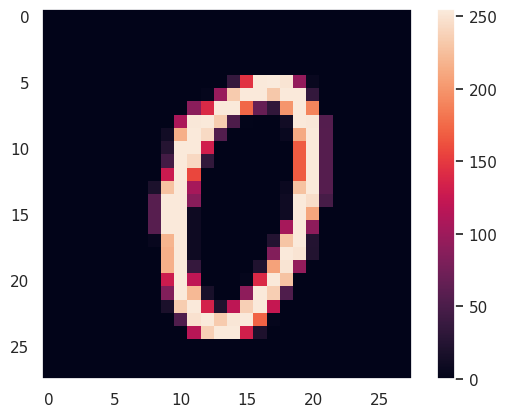

In [ ]:
plt.figure()
plt.imshow(x_train[1000])
plt.colorbar()
plt.grid()
plt.show()

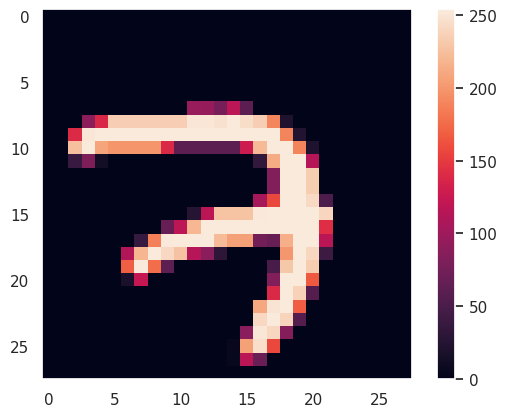

In [ ]:
plt.figure()
plt.imshow(x_train[5000])
plt.colorbar()
plt.grid()
plt.show()

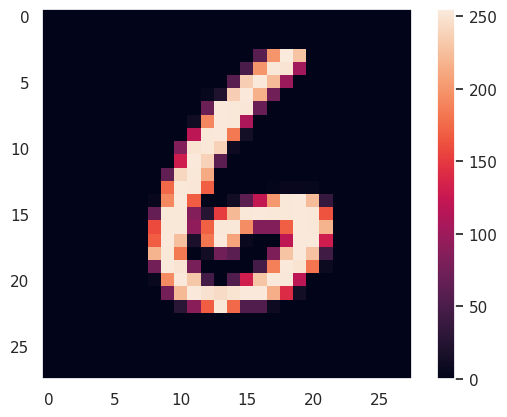

In [ ]:
plt.figure()
plt.imshow(x_train[6000])
plt.colorbar()
plt.grid()
plt.show()

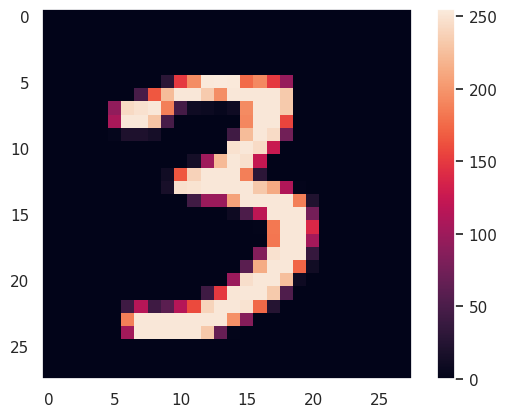

In [ ]:
plt.figure()
plt.imshow(x_train[10000])
plt.colorbar()
plt.grid()
plt.show()

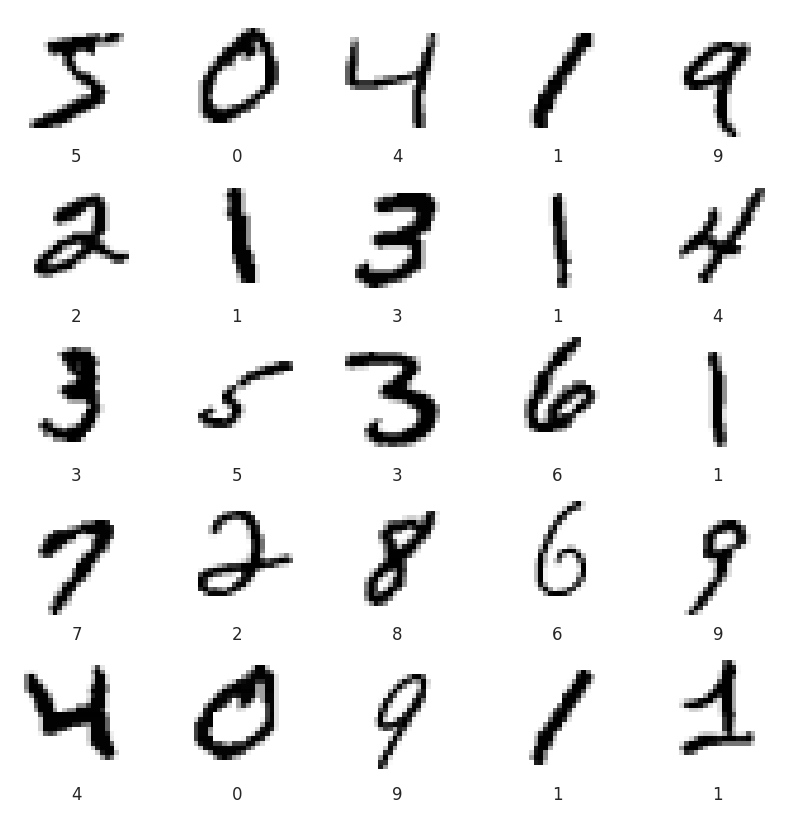

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(digits[y_train[i]])
plt.show()



In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 50, batch_size=64)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 5s 4ms/step - loss: 2.9656 - accuracy: 0.8478 - val_loss: 0.6403 - val_accuracy: 0.8747
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4368 - accuracy: 0.9041 - val_loss: 0.4217 - val_accuracy: 0.9038
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2825 - accuracy: 0.9297 - val_loss: 0.3736 - val_accuracy: 0.9192
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2274 - accuracy: 0.9396 - val_loss: 0.2789 - val_accuracy: 0.9376
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.2031 - accuracy: 0.9457 - val_loss: 0.3162 - val_accuracy: 0.9308
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1984 - accuracy: 0.9495 - val_loss: 0.2758 - val_accuracy: 0.9403
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1777 - accuracy: 0.9526 - val_loss: 0.2559 - val_accuracy: 0.9369
Epoch 8/50
938/93

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=20)

In [ ]:
history1 = model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=callback, epochs = 50, batch_size=64)


Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0712 - accuracy: 0.9825 - val_loss: 0.5534 - val_accuracy: 0.9601
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0815 - accuracy: 0.9811 - val_loss: 0.5221 - val_accuracy: 0.9550
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9808 - val_loss: 0.5569 - val_accuracy: 0.9588
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0798 - accuracy: 0.9818 - val_loss: 0.5808 - val_accuracy: 0.9596
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0749 - accuracy: 0.9833 - val_loss: 0.5422 - val_accuracy: 0.9590
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0728 - accuracy: 0.9831 - val_loss: 0.5850 - val_accuracy: 0.9610
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0832 - accuracy: 0.9820 - val_loss: 0.6059 - val_accuracy: 0.9600
Epoch 